In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
# import dependencies
import logging
import numpy as np

import htfa_torch.tfa as TFA
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s',
                            datefmt='%m/%d/%Y %H:%M:%S',
                            level=logging.INFO)

In [4]:
tfa = TFA.TopographicalFactorAnalysis('data/pieman_data/sub-001-task-intact1.nii', num_factors=25)

In [5]:
prior_sample = tfa.sample()

logging.info('Prior Reconstruction Error (Frobenius Norm): %.8e', np.linalg.norm(
    prior_sample['Y0'].value.data.cpu().numpy() - tfa.voxel_activations.numpy()
))

prior_sample

del prior_sample

05/04/2018 18:07:10 Prior Reconstruction Error (Frobenius Norm): 5.34560840e+03


In [6]:
losses = tfa.train(num_steps=100, log_level=logging.INFO, batch_size=tfa.voxel_activations.shape[0], num_particles=4, use_cuda=True)

05/04/2018 18:07:12 [Epoch 1] (295ms) Posterior free-energy 2.88060846e+10
05/04/2018 18:07:12 [Epoch 2] (217ms) Posterior free-energy 1.87975168e+10
05/04/2018 18:07:12 [Epoch 3] (212ms) Posterior free-energy 3.43323156e+10
05/04/2018 18:07:12 [Epoch 4] (211ms) Posterior free-energy 2.88763617e+10
05/04/2018 18:07:13 [Epoch 5] (215ms) Posterior free-energy 1.81914153e+10
05/04/2018 18:07:13 [Epoch 6] (210ms) Posterior free-energy 1.60611348e+10
05/04/2018 18:07:13 [Epoch 7] (235ms) Posterior free-energy 1.61689856e+10
05/04/2018 18:07:13 [Epoch 8] (208ms) Posterior free-energy 1.34099712e+10
05/04/2018 18:07:13 [Epoch 9] (210ms) Posterior free-energy 1.13734441e+10
05/04/2018 18:07:14 [Epoch 10] (209ms) Posterior free-energy 1.03861309e+10
05/04/2018 18:07:14 [Epoch 11] (209ms) Posterior free-energy 1.03603282e+10
05/04/2018 18:07:14 [Epoch 12] (234ms) Posterior free-energy 9.51849370e+09
05/04/2018 18:07:14 [Epoch 13] (209ms) Posterior free-energy 1.03742915e+10
05/04/2018 18:07:14 [

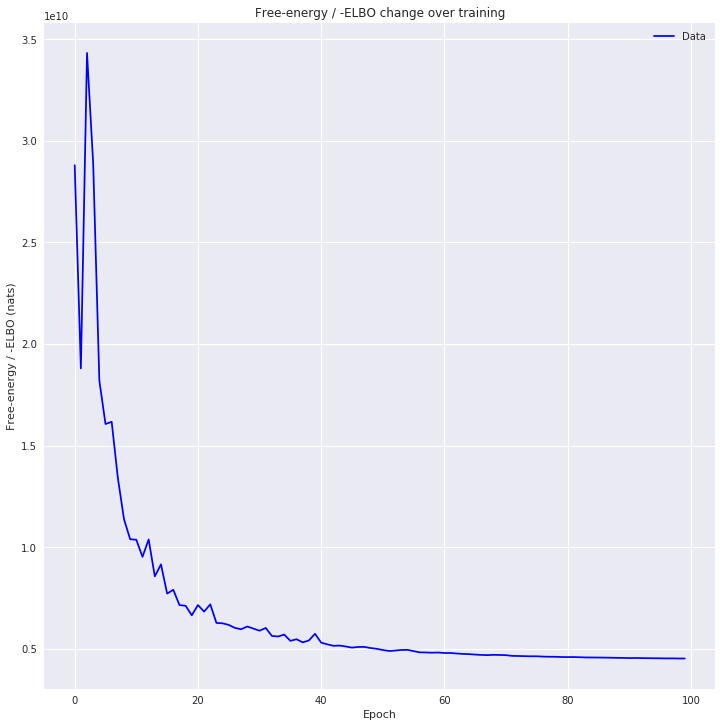

05/04/2018 18:07:34 Reconstruction Error (Frobenius Norm): 4.82773730e+03
05/04/2018 18:07:34 {'weights': array([[-0.43954667,  2.330103  ,  0.8462098 , ...,  0.45500103,
        -2.0177581 ,  0.58631116],
       [-1.2738022 ,  1.0221112 ,  2.020591  , ..., -0.03134451,
         0.3976475 ,  1.5762835 ],
       [-2.0980232 ,  0.25690812,  1.6262271 , ..., -1.5619606 ,
         1.1240928 ,  1.8918931 ],
       ...,
       [-4.156579  ,  0.4066674 ,  1.1671003 , ..., -0.88045883,
         0.40258846,  0.35145396],
       [-4.540202  ,  0.01042051,  2.3032985 , ..., -0.6173152 ,
        -0.2520693 , -0.7239047 ],
       [-5.788215  ,  0.5909054 ,  4.168985  , ...,  2.0739677 ,
         0.67906106, -2.1566424 ]], dtype=float32), 'factors': array([[4.11090720e-03, 4.35921038e-03, 4.59489832e-03, ...,
        3.84221948e-03, 4.27433103e-03, 4.50427597e-03],
       [7.09636137e-04, 6.92177797e-04, 6.70033915e-04, ...,
        6.62169456e-01, 6.86400115e-01, 6.47378683e-01],
       [1.41719080

In [7]:
utils.plot_losses(losses)

results = tfa.results()
logging.info(results)

In [8]:
posterior_sample = tfa.sample(posterior_predictive=True)

logging.info('Prior Reconstruction Error (Frobenius Norm): %.8e', np.linalg.norm(
    posterior_sample['Y0'].value.data.cpu().numpy() - tfa.voxel_activations.numpy()
))

posterior_sample

05/04/2018 18:07:35 Prior Reconstruction Error (Frobenius Norm): 4.85955225e+03


Trace{'Weights0': Normal([torch.FloatTensor of size 1x300x25]), 'FactorCenters0': Normal([torch.FloatTensor of size 1x25x3]), 'FactorLogWidths0': Normal([torch.FloatTensor of size 1x25]), 'Y0': Normal([torch.FloatTensor of size 1x300x94537])}

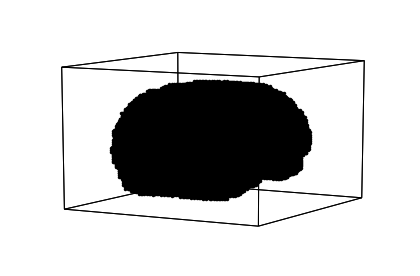

05/04/2018 18:07:35 Reconstruction Error (Frobenius Norm): 4.82692480e+03
/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


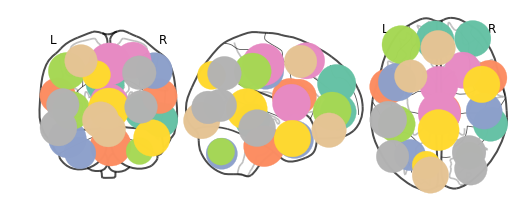

In [9]:
tfa.plot_voxels()
tfa.plot_factor_centers()

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


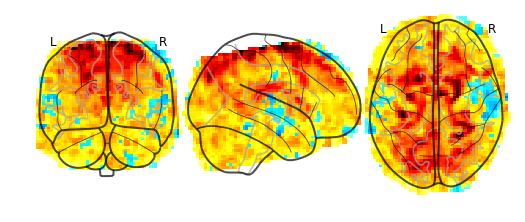

05/04/2018 18:07:37 Reconstruction Error (Frobenius Norm): 4.82685791e+03


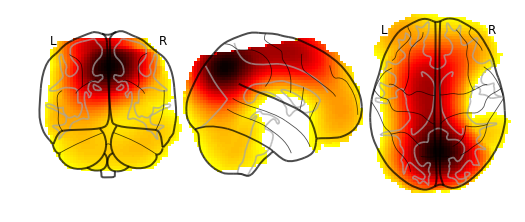

In [10]:
tfa.plot_original_brain()
tfa.plot_reconstruction()

05/04/2018 18:07:50 Reconstruction Error (Frobenius Norm): 4.82694238e+03
/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


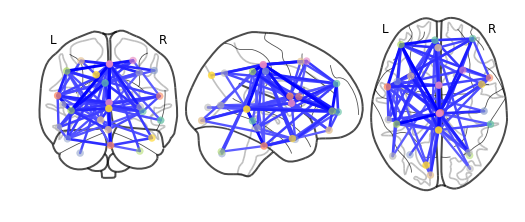

In [11]:
tfa.plot_connectome()